# Projekt z przedmiotu Analiza i Przetwarzanie Obrazów
# Wykonawca : Dawid Jasiński 
# Zadanie : Dany jest obraz kolorowy. Dokonaj segmentacji obrazów kolorowych wykorzystując składowe w różnych modelach kolorów.

# 1. Teoria

# 1.1. Segmentacja

# 1.2 Modele kolorów

# 1.3 Histogram

# 2. Kod własny.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

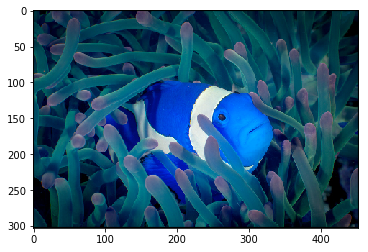

In [2]:
nemo = cv2.imread('./images/nemo2.png')
plt.imshow(nemo)
plt.show()

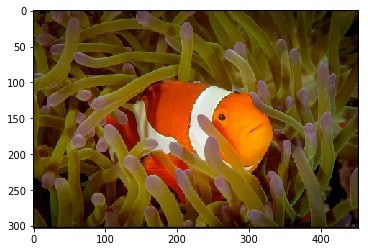

In [3]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

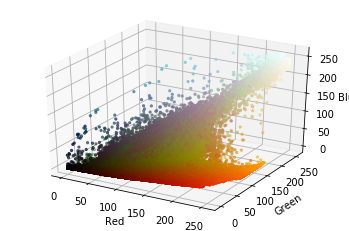

In [5]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

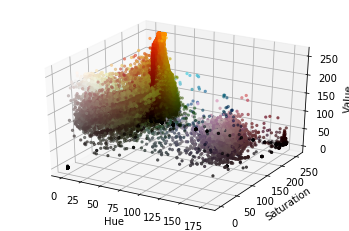

In [6]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

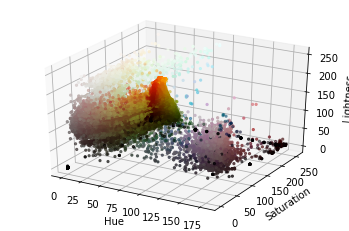

In [7]:
hsl_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HLS)
h, l, s = cv2.split(hsl_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), l.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Lightness")
plt.show()

In [8]:
light_orange = (150, 50, 0) 
dark_orange = (255, 255, 10)

In [9]:
mask = cv2.inRange(nemo, light_orange, dark_orange)

In [10]:
result = cv2.bitwise_and(hsl_nemo, nemo, mask=mask)

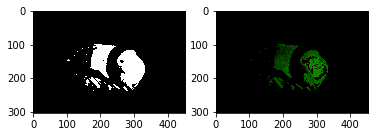

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [12]:
dark_white = (229, 228, 219)
light_white = (255, 255, 255)

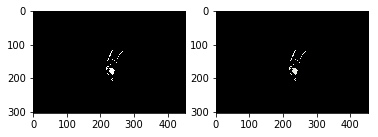

In [13]:
mask_white = cv2.inRange(nemo, dark_white, light_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

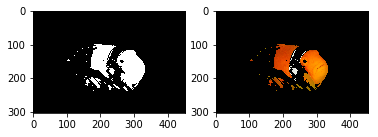

In [14]:
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

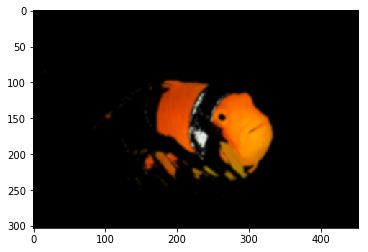

True

In [15]:
rgb_blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(rgb_blur)
plt.show()
rgb_blur = cv2.cvtColor(rgb_blur, cv2.COLOR_BGR2RGB)
cv2.imwrite('segmentation_result_RGB.png',rgb_blur)

In [16]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [17]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [18]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

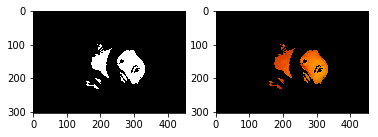

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [20]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

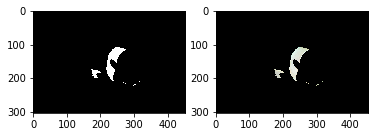

In [21]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

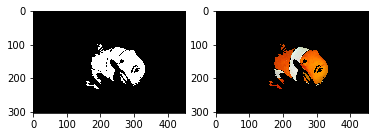

In [22]:
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

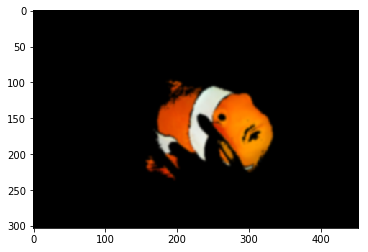

True

In [23]:
hsv_blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(hsv_blur)
plt.show()
hsv_blur = cv2.cvtColor(hsv_blur, cv2.COLOR_BGR2RGB)

cv2.imwrite('segmentation_result_HSV.png',hsv_blur)


In [24]:
light_orange = (1, 100, 150)
dark_orange =  (19, 255, 255)

In [25]:
mask = cv2.inRange(hsl_nemo, light_orange, dark_orange)

In [26]:
result = cv2.bitwise_and(hsl_nemo, nemo, mask=mask)

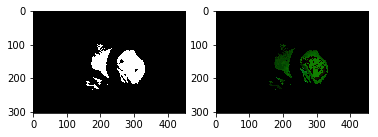

In [27]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [28]:
light_white = (0, 100, 50)
dark_white = (100, 255, 255)

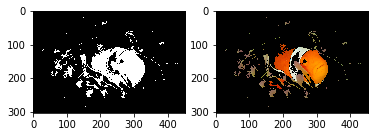

In [29]:
mask_white = cv2.inRange(hsl_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

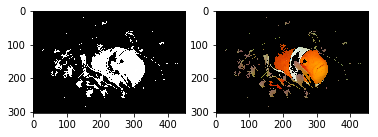

In [30]:
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

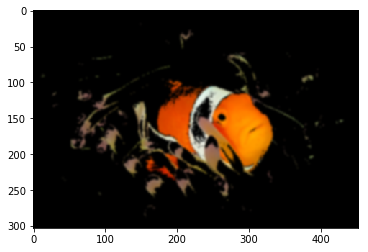

True

In [31]:
hsl_blur = cv2.GaussianBlur(final_result, (7, 7), 0)

plt.imshow(hsl_blur)
plt.show()

hsl_blur = cv2.cvtColor(hsl_blur, cv2.COLOR_BGR2RGB)
cv2.imwrite('segmentation_result_HSL.png',hsl_blur)



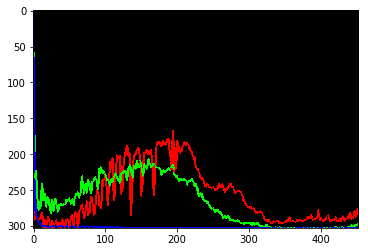

True

In [32]:
from __future__ import print_function
from __future__ import division

src = cv2.imread('./images/nemo2.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
bgr_planes = cv2.split(src)
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive
accumulate = False
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 453
hist_h = 303
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(r_hist[i])) ),
            ( 0, 0, 255), thickness=2)


plt.imshow(histImage)
plt.show()

histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)
cv2.imwrite('histogram_oryginalnego_obrazu.png',histImage)

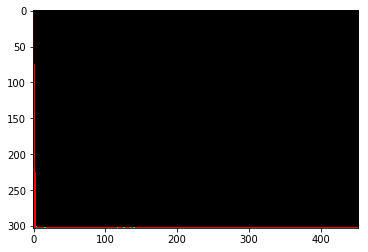

True

In [33]:
src = rgb_blur


bgr_planes = cv2.split(src)
histSize = 256
histRange = (0, 256) 
accumulate = False
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 453
hist_h = 303
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(r_hist[i])) ),
            ( 0, 0, 255), thickness=2)
    
histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)

plt.imshow(histImage)
plt.show()

histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)
cv2.imwrite('histogram_obrazu_po_segmentacji_RGB.png',histImage)

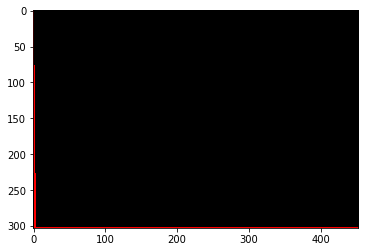

True

In [34]:
src = hsv_blur


bgr_planes = cv2.split(src)
histSize = 256
histRange = (0, 256) 
accumulate = False
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 453
hist_h = 303
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(r_hist[i])) ),
            ( 0, 0, 255), thickness=2)
    
histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)

plt.imshow(histImage)
plt.show()

histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)
cv2.imwrite('histogram_obrazu_po_segmentacji_HSV.png',histImage)

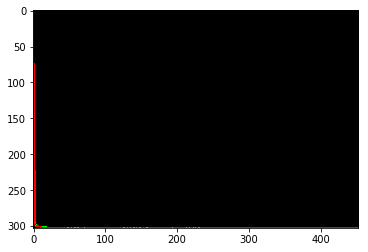

True

In [35]:

src = hsl_blur


bgr_planes = cv2.split(src)
histSize = 256
histRange = (0, 256) 
accumulate = False
b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 453
hist_h = 303
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
for i in range(1, histSize):
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(b_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(b_hist[i])) ),
            ( 255, 0, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(g_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(g_hist[i])) ),
            ( 0, 255, 0), thickness=2)
    cv2.line(histImage, ( bin_w*(i-1), hist_h - int(np.round(r_hist[i-1])) ),
            ( bin_w*(i), hist_h - int(np.round(r_hist[i])) ),
            ( 0, 0, 255), thickness=2)
    
histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)

plt.imshow(histImage)
plt.show()

histImage = cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB)
cv2.imwrite('histogram_obrazu_po_segmentacji_HSL.png',histImage)

# 3. Podsumowanie i wnioski.